<h1 style='text-align:center'><strong>Investigative Analysis of Heart Disease Diagnosis</strong></h1>

Dataset <a href="https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv">Heart Disease UCI</a>

<a id="section_n" name="section_n"></a>

## Table of Contents

* [1. Introduction](#chapter2)
    * [Heart Disease](#section_2_1)
    * [Relevant Study](#section_2_2)
    * [Research Question and Problem Statement](#section_2_3)
    * [Data Description](#section_2_4)
    * [Executive Summary](#section_2_5)
    * [Variable Description](#section_2_6)
* [2. Data Analysis and Exploration](#chapter3)
    * [Data Preparation](#section_3_1)
    * [Missing Values](#section_3_2)
    * [Encoding](#section_3_4)
    * [Exploratory Analysis and Data Visualization](#section_3_5)
* [3. Predicting Heart Disease Using Logistic Regression](#chapter4)
    * [Data Preparation](#section_4_1)
    * [Training A Model](#section_4_2)
    * [Training A State of The Art Model](#section_4_3)
    * [Compare Model Performance](#section_4_4)
    * [Compare Best Dataset](#section_4_5)
    * [Limitations](#section_4_6)
    * [Future Work](#section_4_7)
    * [Conclusion](#section_4_8)

<h4 style="color:lightcoral"><strong>Sources</strong></h4>


* <a href="https://0-www-sciencedirect-com.innopac.wits.ac.za/science/article/pii/0002914989905249?via%3Dihub">International application of a new probability algorithm for the diagnosis of coronary artery disease </a>

* <a href="https://my.clevelandclinic.org/health/diseases/17069-heart-failure-understanding-heart-failure">Understanding Heart failure</a> 

* <a href="https://my.clevelandclinic.org/health/diseases/16898-coronary-artery-disease">Coronary Artery Disease</a>

<a id="chapter2" name="chapter2"></a> 

<h2 style="text-align:center">Introduction: Heart Disease Diagnosis</h2>

<a id="section_2_1" name="section_2_1"></a>

<h4 style="color:lightcoral"><strong>Heart Disease</strong></h4>

The <a href="https://www.cdc.gov/heartdisease/about.htm">CDC</a> describes heart disease as a class of heart conditions that affect the blood flow to the heart. The detrimental effect of a heart condition can lead to a heart attack. A heart attack occurs when the arteries that supply your heart with blood and oxygen are blocked. The blockage is caused by a build-up of fat, and cholesterol that form plaque in the arteries. Such occurrences can restrict the blow flow destroying parts of the heart. Each type of heart disease is caused by a series of different conditions related to specific individuals and contributes significantly to conditions that lead to death.

The <strong>Centers for Disease Control and Prevention</strong>(CDC) approximates that 47% of Americans suffer from risk factors that lead to heart disease. These risk factors are listed as 

* Diabetes

* Overweight and obesity

* Unhealthy diet

About 25% of death in the <a href="https://www.medicalnewstoday.com/articles/237191">United States</a> occur due to heart disease and it affects all genders and ethnic groups. 

<a id="section_2_2" name="section_2_2"></a>

<h4 style="color:lightcoral"><strong>Relevant Study:</strong></h4>
<strong style="color:#E77471">International Application of A New Probability Algorithm For The Diagnosis of Coronary Artery Disease:</strong> Robert Detrano,MD

Robert Detrano tested a discriminant function model for estimating probabilities of angiographic coronary disease on the Cleveland, Ohio, Clinic patients. The reference group comprised of 303 patients for coronary angiography at the Cleveland Clinic between <strong>May 1981</strong> and <strong>September 1984</strong>. Their objective was to make the algorithm relevant to assumed variables(or information) that a medical professional might have access to. In this instance, they chose 13 different predictors relative to the information that clinics usually ask to determine whether a patient has heart disease.

<strong style="color:#E77471">Prior Research Results:</strong>
* David W.Aha & Dennis Kibler attained an accuracy of 77.0% percent 
* John Gennari attained an accuracy of 78.9% percent using a CLASSIT conceptual clustering system

<a id="section_2_3" name="section_2_3"></a>

<h4 style="color:lightcoral"><strong>Researh Question and Problem</strong></h4>

<strong style="color:lightcoral">Research Problem:</strong>
Medical professionals often misclassify patients that suffer from heart disease. Human beings are prone to errors, "to err is human", and it is natural for doctors to incorrectly conclude that a patient that has heart disease does not have it.
We would like to determine the presence of heart disease in a patient, specifically focused on correctly classifying a true positive such that the model tries to learn when a patient has heart disease.

<strong style="color:lightcoral">Hypothesis:</strong>
The logistic regression performed on the combined datasets will produce a better predictive model than previous <a href="https://0-pubmed-ncbi-nlm-nih-gov.innopac.wits.ac.za/2756873/">studies</a>. We hypothesise that the model, having more data, will learn the variability of the distribution of feature values. Thus allowing our model to generalize well for the testing data

<strong style="color:lightcoral">Methodology</strong>:
Determine a predictive model of the combined datasets comprised of the following 
* Cleveland Dataset
* Hungarian Dataset
* Switzerland Dataset
* Long Beach Dataset


<a id="section_2_4" name="section_2_4"></a>

<h4 style="color:lightcoral"><strong>Data Description</strong></h4>
The datasets used in this experiments are collected from the following locations 

* 1. Cleveland Clinic Foundation (cleveland.data)
* 2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
* 3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
* 4. University Hospital, Zurich, Switzerland (switzerland.data)

<strong style="color:lightcoral">Credits:</strong> 
* Hungarian Institute of Cardiology. Budapest: <strong>Andras Janosi, M.D.</strong>
* University Hospital, Zurich, Switzerland: <strong>William Steinbrunn, M.D.</strong>
* University Hospital, Basel, Switzerland: <strong>Matthias Pfisterer, M.D.</strong>
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: <strong>Robert Detrano, M.D., Ph.D.</strong>

The data collected from these clinics contain 76 attributes. Previous selected 14 attributes based on statistical significance that determine the present of heart disease. As such, we will extend their approach by using the same attributes but combining different datasets from different universities.

The following is the attributes used in the dataset<br>
<strong style="color:#E77471">Age:</strong> 
> $ x \in \mathbb{R}$ 


<strong style="color:#E77471">Sex</strong>
> 0 = Female

> 1 = Male



<strong style="color:#E77471">Chol: Serum Cholestoral in mg/dl</strong>
> $ x \in \mathbb{R}$ 


<strong style='color:#E77471'>Trestbps: Resting Blood Pressure (in mm Hg on admission to the hospital)</strong>
> $ x \in \mathbb{R}$ 


<strong style="color:#E77471">Chest Pain Type</strong>
> Value 1 = Typical Angina

> Value 2 = Atypical Angina

> Value 3 = Non-Anginal Pain

> Value 4 = Asymptomatic



<strong style="color:#E77471">Thalach: Maximum Heart Rate Achieved</strong>
> $ x \in \mathbb{R}$ 


<strong style="color:#E77471">Exang: Exercise Induced Angina </strong>
> 1 = Yes

> 0 = No

<strong style="color:#E77471">Fasting Blood Sugar > 120 mg</strong>
> 1 = True

> 2 = False 


<strong style="color:#E77471">Resting Electrocardiographic Results</strong>
>  Value 0=  Normal

>  Value 2=Having ST-T Wave Abnormality (T Wave Inversions)

>  Value 3= Showing Probable or Definite Left Ventricular Hypertrophy

<strong style='color:#E77471'>OldPeak = ST Depression Induced by Exercise Relative to Eest</strong>
> $ x \in \mathbb{R}$ 



<strong style='color:#E77471'>ca: Number of Major Vessels (0-3) colored by flourosopy</strong>

<strong style='color:#E77471'>thal: </strong>
> 3 = normal

> 6 = fixed defect

> 7 = reversable defect

<strong style="color:#E77471">Slope: The Slope of the Peak Exercise of ST Segment</strong>
>  Value 1= Upsloping

>  Value 2= Flat

>  Value 3= Downsloping


<strong style="color:#E77471">Target: Presence of Heart Disease</strong>
>  Value 0= Absence

>  Value 1= Presence


<a id="section_2_5" name="section_2_5"></a>

<h4 style="color:lightcoral"><strong>Executive Summary</strong></h4>

<a id="chapter3" name="chapter3"></a> 

<h2 style="text-align:center">Data Analysis and Exploration</h2>

<a id="section_3_1" name="section_3_1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import engine.data_preparation as dp
import engine.data_visualization as dv
import engine.logistic_regression as lr
import engine.accuracy as acc
import seaborn as sns
import warnings
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline
warnings.filterwarnings('ignore')
%load_ext autoreload

%autoreload

<h4 style="color:lightcoral"><strong>Data Preparation</strong></h4>

> Read dataset 

> Appropriately change data types

> Description 
> * Number of rows
> * Number of features

> Is the data balanced ?


In [2]:
dir_str = "Datasets/data/processed.{}.data"
names = {"age":"Age","sex":"Sex","cp":"Chest Pain Type","trestbps":"Resting Blood Pressure","chol":"Serum Cholestoral In mg/dl",
         "fbs":"Fasting Blood Sugar > 120 mg/dl","restecg":"Resting Electrocardiographic Results","thalach":"Duration of Exercise In Minutes",
         "exang":"Exercise Induced Angina","oldpeak":"ST Depression Induced By Exercise","slope":"The Slope of The Peak Exercise ST Segment",
         "ca":"Number of Major Vessels","thal":"Normal/Fixed or Reversable Defect","num":"Presence"
        }
convert_dict = {'sex': int,'cp': int,'fbs':int,'restecg':int,'exang':int,'slope':int,'ca':int,'num':int}
columns = list(names.keys())

In [3]:
cleveland = pd.read_csv(dir_str.format("cleveland"),names=columns,na_values='?')
hungarian = pd.read_csv(dir_str.format("hungarian"),names=columns,na_values='?')
switzerland = pd.read_csv(dir_str.format("switzerland"),names=columns,na_values='?')
va = pd.read_csv(dir_str.format("va"),names=columns,na_values='?')
print("{}: Number of Rows: {} x Number of Columns: {} ".format("cleveland",len(cleveland),len(cleveland.columns)))
print("{}: Number of Rows: {} x Number of Columns: {} ".format("hungarian",len(hungarian),len(hungarian.columns)))
print("{}: Number of Rows: {} x Number of Columns: {} ".format("switzerland",len(switzerland),len(switzerland.columns)))
print("{}: Number of Rows: {} x Number of Columns: {} ".format("long beach",len(va),len(va.columns)))
print('======================================================================================================')
cleveland.head()

cleveland: Number of Rows: 303 x Number of Columns: 14 
hungarian: Number of Rows: 294 x Number of Columns: 14 
switzerland: Number of Rows: 123 x Number of Columns: 14 
long beach: Number of Rows: 200 x Number of Columns: 14 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
cleveland = dp.group_target(cleveland);hungarian =  dp.group_target(hungarian)
switzerland = dp.group_target(switzerland);va =  dp.group_target(va)
heart_data = pd.concat([cleveland,hungarian,switzerland,va])
heart_data = heart_data.drop_duplicates()
display_missing_info = pd.DataFrame(heart_data.isnull().sum())
display_missing_info.rename(columns={0:"Missing Values"},inplace=True)
display_missing_info

,Missing Values
age,0
sex,0
cp,0
trestbps,59
chol,29
fbs,90
restecg,2
thalach,55
exang,55
oldpeak,62


<a id="section_3_2" name="section_3_2"></a>

<h4 style="color:lightcoral"><strong>Missing Values</strong></h4>
<strong style="color:lightcoral">Goals</strong>: Create 3 different datasets from:

> Dropping values

> Replacing missing values with the modes

In [5]:
# ============== Drop Missing Values
drop_missing_cleveland = (cleveland.copy().dropna()).astype(convert_dict)
drop_missing_hungarian = ( hungarian.copy().dropna()).astype(convert_dict)
drop_missing_switzerland = (switzerland.copy().dropna()).astype(convert_dict)
drop_missing_va = (va.copy().dropna()).astype(convert_dict)
drop_missing_heart = (heart_data.copy().dropna()).astype(convert_dict) # This is the combined dataset


# ================ Mode Dataset  - Missing values replaced with the mode
mode_cleveland = ((dp.replace_missing_with_mode(cleveland.copy())).astype(convert_dict)).drop_duplicates()
mode_hungarian = ((dp.replace_missing_with_mode(hungarian.copy())).astype(convert_dict)).drop_duplicates()
mode_switzerland = ((dp.replace_missing_with_mode(switzerland.copy())).astype(convert_dict)).drop_duplicates()
mode_va = ((dp.replace_missing_with_mode(va.copy())).astype(convert_dict)).drop_duplicates()
mode_heart = ((dp.replace_missing_with_mode(heart_data.copy())).astype(convert_dict)).drop_duplicates()

<a id="section_3_3" name="section_3_3"></a>

<h4 style="color:lightcoral"><strong>Encoding</strong></h4>
<strong style="color:lightcoral">Goals</strong>: Encode the data for model preparation

> One-Hot encode dataset


In [6]:
# ============== Drop Missing Values
encode_drop_missing_cleveland = dp.one_hot_encoding_2(drop_missing_cleveland)
encode_drop_missing_hungarian = dp.one_hot_encoding_2(drop_missing_hungarian)
encode_drop_missing_switzerland = dp.one_hot_encoding_2(drop_missing_switzerland)
encode_drop_missing_va = dp.one_hot_encoding_2(drop_missing_va)
encode_drop_missing_heart = dp.one_hot_encoding_2(drop_missing_heart)

# ================ Mode Dataset  - Missing values replaced with the mode
encode_mode_cleveland = dp.one_hot_encoding_2(mode_cleveland)
encode_mode_hungarian = dp.one_hot_encoding_2(mode_hungarian)
encode_mode_switzerland = dp.one_hot_encoding_2(mode_switzerland)
encode_mode_va = dp.one_hot_encoding_2(mode_va)
encode_mode_heart = dp.one_hot_encoding_2(mode_heart)

<a id="section_3_5" name="section_3_5"></a>

<h4 style="color:lightcoral"><strong>Exploratory Analysis and Data Visualization</strong></h4>


> Countplots

> Histogram

> Box Plot


In [7]:
categories = list(convert_dict.keys())
continuous = list(filter(lambda x:x not in categories,drop_missing_cleveland.columns))
drop_missing_cleveland

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,1,145.0,233.0,1,1,150.0,0,2.3,1,0,6.0,0
1,67.0,1,1,160.0,286.0,0,1,108.0,1,1.5,1,1,1.0,1
2,67.0,1,1,120.0,229.0,0,1,129.0,1,2.6,1,1,7.0,1
3,37.0,1,1,130.0,250.0,0,0,187.0,0,3.5,1,0,1.0,0
4,41.0,0,1,130.0,204.0,0,1,172.0,0,1.4,1,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0,1,140.0,241.0,0,0,123.0,1,0.2,1,0,7.0,1
298,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,1,0,7.0,1
299,68.0,1,1,144.0,193.0,1,0,141.0,0,3.4,1,1,7.0,1
300,57.0,1,1,130.0,131.0,0,0,115.0,1,1.2,1,1,7.0,1


Below is a count plot such that the y-axis is given by the age and the x-axis by the sex.
0 represents the females and 1 represents the males. Num(legend) is the target class where 0 is absence and 1 is presence of heart disease. Given the below plot, we can see that mostly women, on average, contribute mostly to having heart diseaase and their relative age is around 50 and 60

<AxesSubplot:xlabel='sex', ylabel='age'>

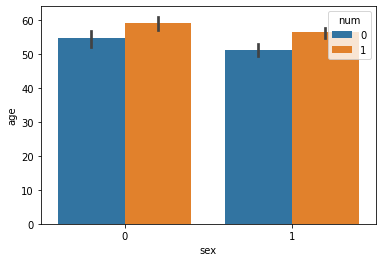

In [8]:
description_dataset = dp.make_description_dataset(drop_missing_cleveland,categories)
sns.barplot(x="sex", y="age", data=drop_missing_cleveland,hue='num')

Below, we can note that the dataset is relatively balanced. There is no indication of one target class overwhleming the other.

<AxesSubplot:xlabel='num', ylabel='count'>

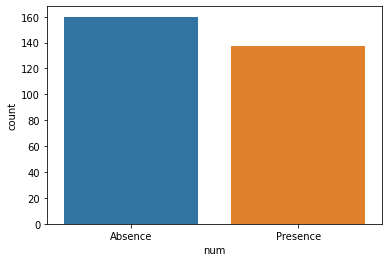

In [9]:
sns.countplot(x="num",data=description_dataset)

Below is the bar graphs that represent how many unique values exist for each feature. This allows us to see the distribution of the data and determine whether there is an overwhelming obersvation from each attribute

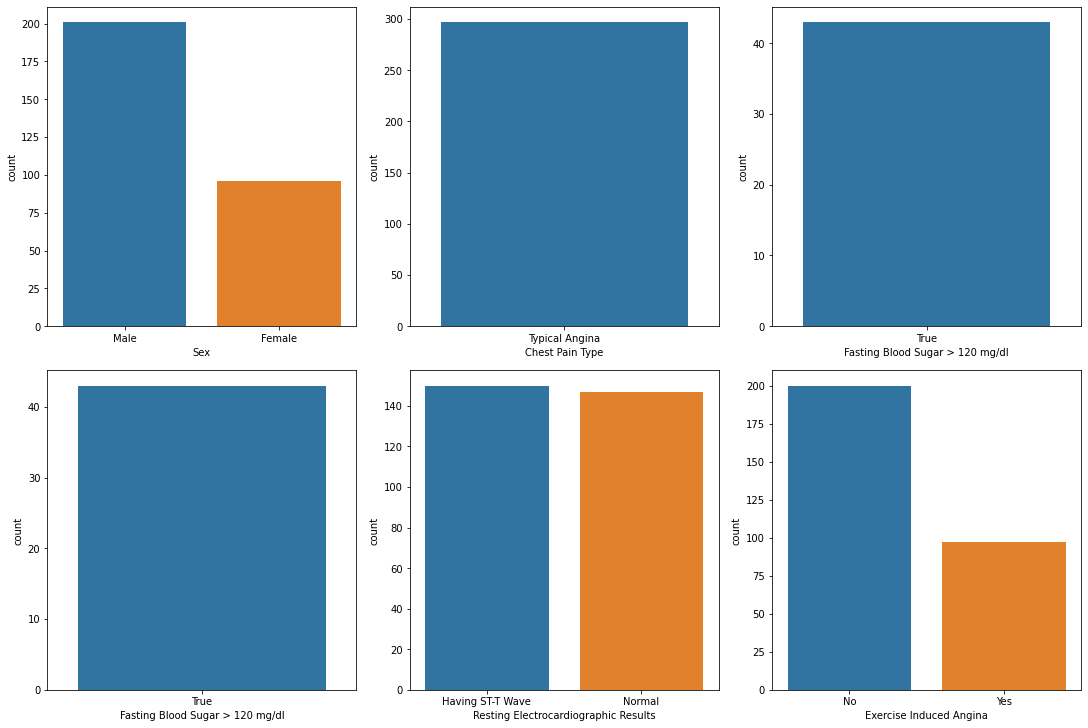

In [10]:
dv.count_plot_categories(description_dataset,categories,names)

Below is the distribution of feature values for each attribute where the each attribute is separated by whether a patient has heart disease or not

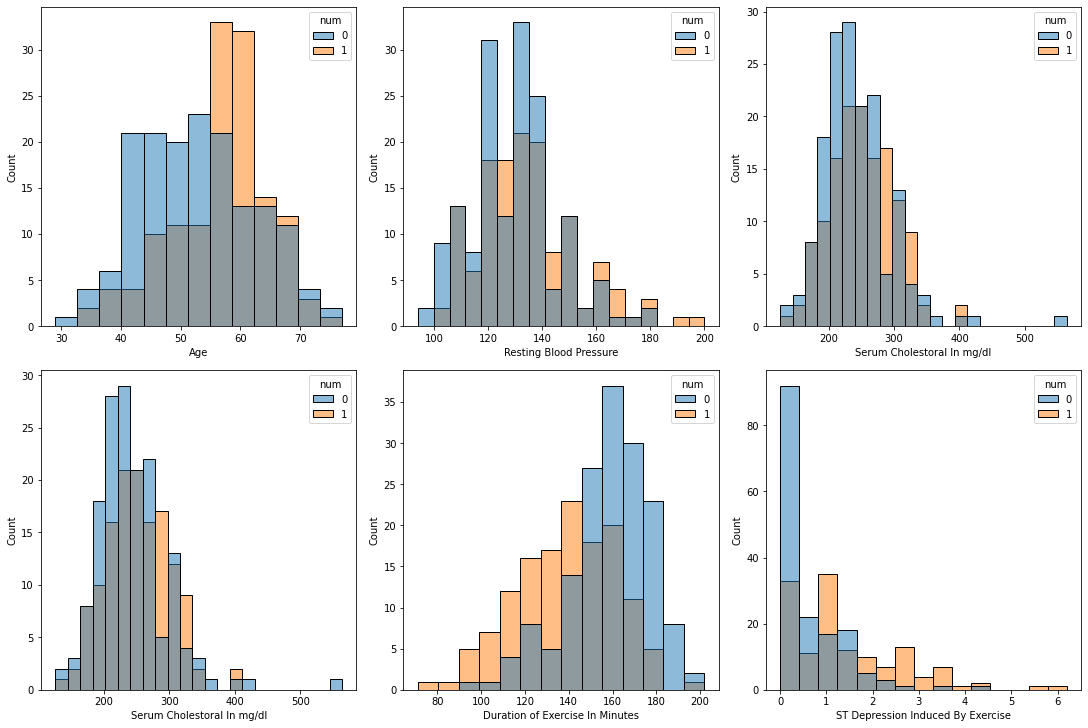

In [11]:
dv.hist_plot_continuous(drop_missing_cleveland,continuous,names,n=3,m=2,hue='num')

Below is the box plot representing the summary statistics of each attribute. This allows us to summarize the distribution of each attribute to get an understanding of the data. We can see the following means 
* <strong>Age</strong>: Approx 55
* <strong>Resting Blood Pressure</strong>: 130
* <strong>Cholestoral</strong>: Approx 250 in mg
* <strong>Duration of Exercise </strong>: Approx 155 Minutes

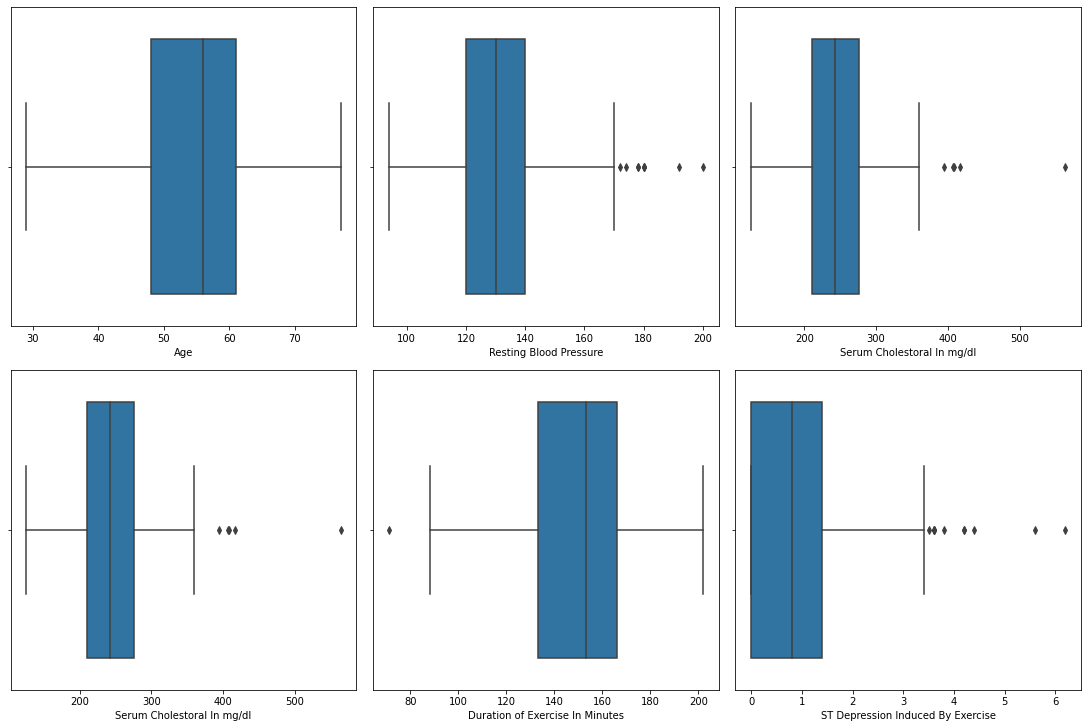

In [12]:
dv.box_plot_continuous(drop_missing_cleveland,continuous,names,n=3,m=2,hue='num')

<a id="chapter_4" name="chapter_4"></a>

<h2 style="text-align:center">Predicting Heart Disease Using Logistic Regression</h2>

> Train a model to predict heart disease 
> * Perform Hyperparameter Tuning

> Optimize the model to predict heart disease 
> * Perform Hyperparameter Tuning

> Train a state of the art algorithm

> Compare the three models and interpret the results


> Finalize the choice of the final model

<a id="section_4_1" name="section_4_1"></a>

<h4 style="color:lightcoral"><strong>Data Preparation</strong></h4>

> Train Validation Test Split

> Using the dataset that dropped the missing values

> Set the hyperparameters of the model


In [13]:
model_dataset = encode_drop_missing_heart.copy()
model_dataset = dp.minmax_scale(model_dataset)
model_dataset = dp.add_bias(model_dataset)
model_dataset = model_dataset.sample(frac=1).reset_index(drop=True)
model_dataset

,Bias,age,trestbps,chol,thalach,oldpeak,thal,sex_0,sex_1,cp_1,...,fbs_1,restecg_0,restecg_1,exang_0,exang_1,slope_1,slope_2,ca_0,ca_1,num
0,1.0,0.479167,0.169811,0.280172,0.679389,0.000000,0.000000,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1
1,1.0,0.458333,0.433962,0.346983,0.877863,0.000000,0.000000,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0
2,1.0,0.729167,0.433962,0.506466,0.664122,0.000000,0.000000,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
3,1.0,0.250000,0.245283,0.122845,0.847328,0.000000,0.000000,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
4,1.0,0.625000,0.716981,0.405172,0.671756,0.032258,1.000000,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,0.500000,0.339623,0.353448,0.549618,0.064516,0.000000,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
295,1.0,0.583333,0.528302,0.379310,0.312977,0.096774,0.833333,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1
296,1.0,0.604167,0.490566,0.254310,0.259542,0.161290,1.000000,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1
297,1.0,0.520833,0.264151,0.400862,0.343511,0.516129,0.000000,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1


In [14]:
X = model_dataset.iloc[:,:-1]
y = model_dataset.iloc[:,-1] # # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
sixty_split =  int(len(model_dataset) * 0.6)
twenty_split = int(len(model_dataset) * 0.2)
X_train = X.iloc[:sixty_split];X_valid = X.iloc[sixty_split:sixty_split+twenty_split];X_test = X.iloc[sixty_split+twenty_split:]
y_train = y.iloc[:sixty_split];y_valid = y.iloc[sixty_split:sixty_split+twenty_split];y_test = y.iloc[sixty_split+twenty_split:]

In [15]:
training_data = X_train.join(y_train)
validation_data = X_valid.join(y_valid)
testing_data = X_test.join(y_test)
testing_data.head()

,Bias,age,trestbps,chol,thalach,oldpeak,thal,sex_0,sex_1,cp_1,...,fbs_1,restecg_0,restecg_1,exang_0,exang_1,slope_1,slope_2,ca_0,ca_1,num
238,1.0,0.583333,0.339623,0.293103,0.786260,0.000000,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1
239,1.0,0.479167,0.292453,0.241379,0.740458,0.161290,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1
240,1.0,0.395833,0.339623,0.377155,0.519084,0.032258,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
241,1.0,0.625000,0.433962,0.165948,0.694656,0.000000,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1
242,1.0,0.604167,0.528302,0.366379,0.305344,0.129032,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1


In [16]:
learning_rates =  [0.4,0.8,0.5,0.6]
regularization_terms=[0.1,0.5,0.8,0.9]
epochs = [80,100,60,70]

<a id="section_4_2" name="section_4_2"></a>

<h4 style="color:lightcoral"><strong>Training A Model</strong></h4>

> Train A Logistic Regression Model using stochastic gradient descent

> Train A Regularized Model using stochastic gradient descent

> Train An Optimized Logistic Regression Model Using Mini-Batch Gradient Descent

> Tune hyperparameters

> Choose the best model


In [17]:
hyperparameter = lr.validation_with_regularization(training_data,validation_data,y_valid,learning_rates = learning_rates,epochs =epochs,regularization_terms=regularization_terms) 

In [18]:
lrate = learning_rates[hyperparameter]
nepochs = epochs[hyperparameter]
regularized_term=regularization_terms[hyperparameter]
print("The tuned learning rate hyperparemter is :", lrate)
print("The tuned epochs hyperparemter is :", nepochs)
print("The tuned regularized_term hyperparemter is :", regularized_term)

The tuned learning rate hyperparemter is : 0.4
The tuned epochs hyperparemter is : 80
The tuned regularized_term hyperparemter is : 0.1


In [ ]:
types = ["bincross","regularization","bincross_mini_batch"]
type_titles = ["Logistic Regression With SGD","Logistic Regression With Regularization and SGD","Logistic Regression With Mini-Batch Gradient Descent"]
normal_avg_acc,normal_predictions,normal_results,normal_ = lr.average_results(training_data,testing_data,y_test,lrate=lrate,nepochs=nepochs,regularized_term=0,niters=5,batch_size=32,type_="normal")
regularization_avg_acc,regularization_predictions,regularization_results,regularization_ = lr.average_results(training_data,testing_data,y_test,lrate=lrate,nepochs=nepochs,regularized_term=regularized_term,niters=5,batch_size=32,type_="regularization")
mini_batch_avg_acc,mini_batch_predictions,mini_batch_results,mini_batch_ = lr.average_results(training_data,testing_data,y_test,lrate=lrate,nepochs=nepochs,regularized_term=regularized_term,niters=5,batch_size=32,type_="bincross_mini_batch")

In [ ]:
print("The accuracy for logistic regression model without regularization is: {}%".format(normal_avg_acc))
print("The accuracy for regularized logistic regression model is: {}%".format(regularization_avg_acc))
print("The accuracy for optimized logistic regression model using mini-batch is: {}%".format(mini_batch_avg_acc))

In [ ]:
results = [normal_results,regularization_results,mini_batch_results]
predictions =[normal_predictions,regularization_predictions,mini_batch_predictions]
errors = [normal_,regularization_,mini_batch_]

In [ ]:
predicted_dataset = testing_data.copy()
predicted_dataset['normal_predictions'] = normal_results
predicted_dataset['regularized_predictions'] = regularization_results
predicted_dataset['optimized_predictions'] = mini_batch_results
predicted_dataset.head()

In [ ]:
acc.plot_cost_functions(nepochs,errors,type_titles)

In [ ]:
acc.display_confusion_matrices(y_test,results,type_titles)

In [ ]:
acc.plot_roc_curves(y_test,predictions,type_titles)

The best model is the logistic regression with regularization using stochastic gradient descent

<a id="section_4_3" name="section_4_3"></a>

<h4 style="color:lightcoral"><strong>Training A State of The Art Model</strong></h4>

> Train A State of The Art Logistic Regression Model

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
chosen_titles = ["State of the Art Model","Best Model: Logistic Regression With Regularization Using SGD"]
compare_results = [y_pred,regularization_results]
# mini_batch_avg_acc,mini_batch_predictions,mini_batch_results,mini_batch_ 
# regularization_avg_acc,regularization_predictions,regularization_results,regularization_
compare_predictions = [y_pred_proba,regularization_predictions]

In [ ]:
print("The accuracy of the state of the art logistic regression  is: {}".format(acc.accuracy_metric(y_test,y_pred)))
print("The accuracy of the best logistic regression  is: {}".format(regularization_avg_acc))

In [ ]:
acc.display_confusion_matrices(y_test,compare_results,chosen_titles)

In [ ]:
acc.plot_roc_curves(y_test,compare_predictions,chosen_titles)

<a id="section_4_4" name="section_4_4"></a>

<h4 style="color:lightcoral"><strong>Compare Model Performance</strong></h4>

> Compare the state of the art and the best chosen model

We can see that the logisitic regression model with regularization using stochastic gradient descent performs relatively closely to the state of the art algorithm in terms of the ROC curve and AUC value

<a id="section_4_5" name="section_4_5"></a>

<h4 style="color:lightcoral"><strong>Compare Best Dataset</strong></h4>

> Run regularized logistic regression on the other dataset(data with the mode replacing the missing values)

In [ ]:
mode_dataset = encode_mode_heart.copy()
mode_dataset = dp.minmax_scale(mode_dataset)
mode_dataset = dp.add_bias(mode_dataset)
mode_dataset = mode_dataset.sample(frac=1).reset_index(drop=True)
mode_dataset

In [ ]:
X_mode = mode_dataset.iloc[:,:-1]
y_mode = mode_dataset.iloc[:,-1] # # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
sixty_split =  int(len(mode_dataset) * 0.6)
twenty_split = int(len(mode_dataset) * 0.2)
X_train_mode = X_mode.iloc[:sixty_split];X_valid_mode = X_mode.iloc[sixty_split:sixty_split+twenty_split];X_test_mode = X_mode.iloc[sixty_split+twenty_split:]
y_train_mode = y_mode.iloc[:sixty_split];y_valid_mode = y_mode.iloc[sixty_split:sixty_split+twenty_split];y_test_mode = y_mode.iloc[sixty_split+twenty_split:]

In [ ]:
training_data_mode = X_train_mode.join(y_train_mode)
validation_data_mode = X_valid_mode.join(y_valid_mode)
testing_data_mode = X_test_mode.join(y_test_mode)
testing_data_mode.head()

In [ ]:
lrate = learning_rates[hyperparameter]
nepochs = epochs[hyperparameter]
regularized_term=regularization_terms[hyperparameter]

In [ ]:
mode_regularization_avg_acc,mode_regularization_predictions,mode_regularization_results,mode_regularization_ = lr.average_results(training_data_mode,testing_data_mode,y_test_mode,lrate=lrate,nepochs=nepochs,regularized_term=regularized_term,niters=5,batch_size=32,type_="regularization")

In [ ]:
choose_results = [regularization_results,mode_regularization_results]
# # mini_batch_avg_acc,mini_batch_predictions,mini_batch_results,mini_batch_ 
# regularization_avg_acc,regularization_predictions,regularization_results,regularization_
choose_predictions =[regularization_predictions,mode_regularization_predictions]
choose_errors = [regularization_,mode_regularization_]
choose_titles = ["Regularized Logistic With Dropped Missing Data","Regularized Logistic With Mode Replacing Missing Data "]

In [ ]:
print("The accuracy for {} is {}%".format(choose_titles[0],regularization_avg_acc))
print("The accuracy for {} is {}%".format(choose_titles[1],mode_regularization_avg_acc))

In [ ]:
acc.plot_cost_functions(nepochs,choose_errors,choose_titles)

In [ ]:
acc.display_confusion_matrix(y_test,regularization_results)
plt.title(choose_titles[0])
#  regularization_avg_acc,regularization_predictions,regularization_results,regularization_
# mode_minibatch_avg_acc,mode_minibatch_predictions,mode_minibatch_results,mode_minibatch_
# mini_batch_avg_acc,mini_batch_predictions,mini_batch_results,mini_batch_ 

In [ ]:
acc.display_confusion_matrix(y_test_mode,mode_regularization_results)
plt.title(choose_titles[1])

In [ ]:
acc.plot_roc_curve(y_test,regularization_predictions)
plt.title(choose_titles[0])

In [ ]:
acc.plot_roc_curve(y_test_mode,mode_regularization_predictions)
plt.title(choose_titles[1])

<a id="section_4_6" name="section_4_6"></a>

<h4 style="color:lightcoral"><strong>Limitations</strong></h4>
Research on this dataset only contained 14 attributes from 76 attributes. We hypothesise that the model might not be able to generalize to datasets that include new factors that might contribute to heart disease. This means that future works may improve the algorithm by including more attributes to account for a variety of new information

<a id="section_4_7" name="section_4_7"></a>


<h4 style="color:lightcoral"><strong>Future Work</strong></h4>
Our algorithm has taken account of all datasets. Prior research perform algorithms on their respective datasets relative to their schools. We have further extended and improved their algorithm to give a better diagnosis on whether a patient has heart disease. 

We investigated our algorithms by using the combined datasets in two different ways. We dropped the missing values and replaced the missing values with the mode of the feature. The performance an algorithm trained on data that learns the outcome of the missing values is left for investigations

<a id="section_4_8" name="section_4_8"></a>

<h4 style="color:lightcoral"><strong>Conclusion</strong></h4>


Heart disease is a terrible condition that has a high rate of deaths. Creating algorithms that will detect conditions that could lead to the inference that a patient may have heart disease could save their lives. Logistic regression does in well in predicting whether an individual suffers from heart disease or not

[back to top](#section_n)